In [29]:
import pickle

with open('/home/jan/projects/HARVARD/mikail/graph_transformer/data/dag_path_scm.pkl', 'rb') as f:
    dag = pickle.load(f)

print(dag)

DiGraph with 200 nodes and 1051 edges


Random DAG created:
{0: [1, 2, 3, 8, 10, 11, 14], 1: [2, 5, 11, 13, 14, 19], 2: [3, 7, 9, 12, 13, 14], 3: [4, 6, 16, 19], 4: [5, 8, 11, 15], 5: [6, 8, 9, 12, 14, 19], 6: [7, 8, 9, 11, 14, 17], 7: [8, 11, 14, 17, 18], 8: [9, 10, 11, 13, 17], 9: [10, 14, 17, 18], 10: [11, 16], 11: [12, 14], 12: [13], 13: [14, 17], 14: [15, 17], 15: [16], 16: [17], 17: [18, 19], 18: [19], 19: []}


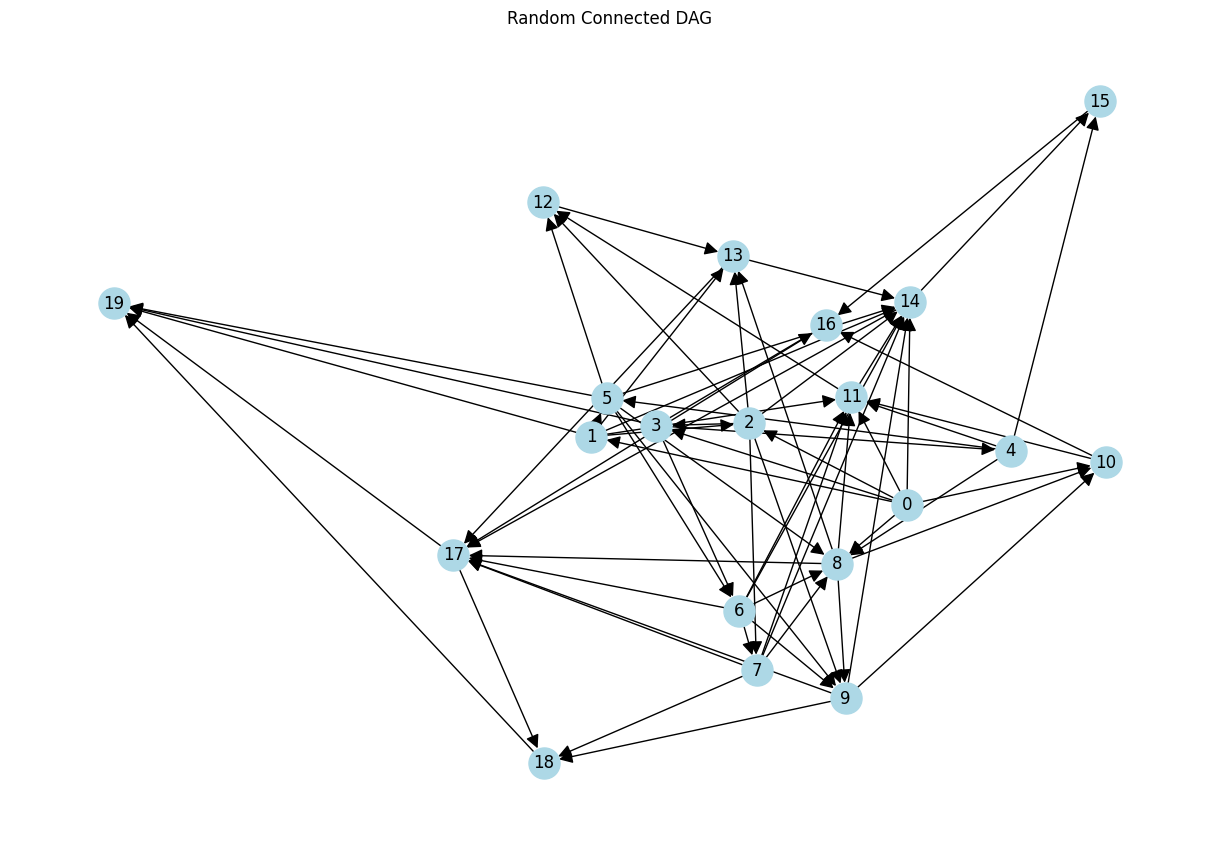

In [23]:
import networkx as nx
import random

def create_random_connected_dag(num_nodes, edge_probability=0.3):
    # Create an empty directed graph
    G = nx.DiGraph()
    
    # Add nodes to the graph
    nodes = list(range(num_nodes))
    G.add_nodes_from(nodes)
    
    # Ensure the graph is connected by adding a path through all nodes
    for i in range(num_nodes - 1):
        G.add_edge(i, i + 1)
    
    # Add random edges
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(i, j)
    
    return G

# Create a random connected DAG
num_nodes = 20  # You can adjust this number
random_dag = create_random_connected_dag(num_nodes)

# Convert the NetworkX graph to a dictionary representation
dag = {node: list(random_dag.successors(node)) for node in random_dag.nodes()}

print("Random DAG created:")
print(dag)

# Optionally, visualize the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(random_dag)
nx.draw(random_dag, pos, with_labels=True, node_color='lightblue', 
        node_size=500, arrowsize=20)
plt.title("Random Connected DAG")
plt.show()


In [30]:
import networkx as nx

# Create a NetworkX graph from the DAG
G = nx.DiGraph(dag)
# make the graph undirected
G = G.to_undirected()

# Initialize a dictionary to store shortest paths
shortest_paths = {}

# Get all nodes in the graph
nodes = list(G.nodes())

# Compute shortest paths between all pairs of nodes
for source in nodes:
    for target in nodes:
        if source != target:
            try:
                # Find the shortest path
                path = nx.shortest_path(G, source=source, target=target)
                if len(path) > 2:
                # Store the path in the dictionary
                    shortest_paths[(source, target)] = path
            except nx.NetworkXNoPath:
                # If no path exists, store None or an empty list
                continue

print(f"Number of shortest paths computed: {len(shortest_paths)}")

# Example: Print a few shortest paths
for i, ((source, target), path) in enumerate(shortest_paths.items()):
    print(f"Shortest path from {source} to {target}: {path}")
    if i == 4:  # Print only the first 5 paths as an example
        break



Number of shortest paths computed: 37698
Shortest path from X129 to X36: ['X129', 'X31', 'X36']
Shortest path from X129 to X140: ['X129', 'X91', 'X140']
Shortest path from X129 to X192: ['X129', 'X10', 'X192']
Shortest path from X129 to X28: ['X129', 'X92', 'X28']
Shortest path from X129 to X179: ['X129', 'X124', 'X179']


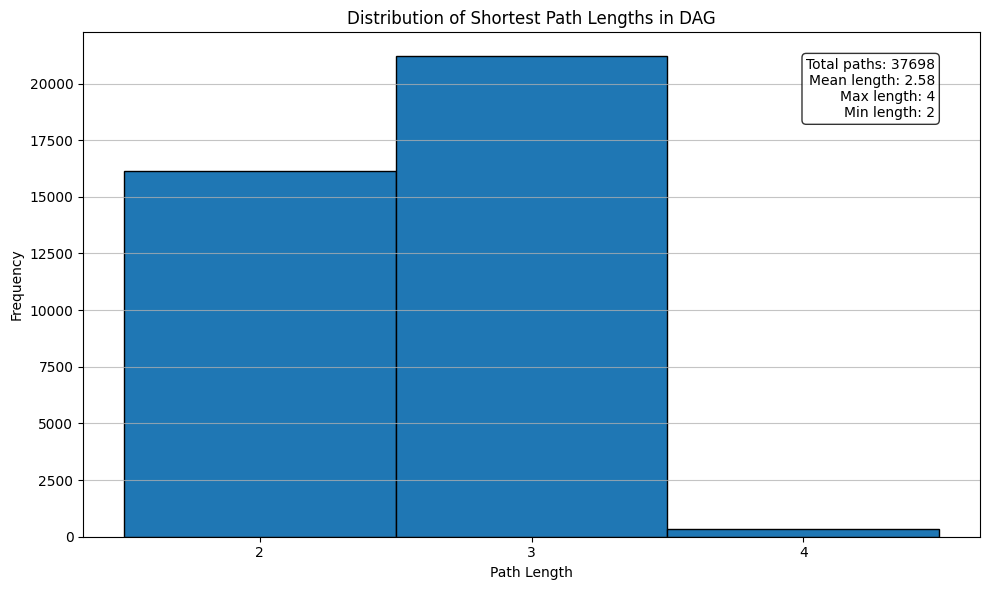

Total number of paths: 37698
Average path length: 2.58
Maximum path length: 4
Minimum path length: 2


In [31]:
import matplotlib.pyplot as plt

# Calculate the lengths of all shortest paths
path_lengths = [len(path) - 1 for path in shortest_paths.values()]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=range(min(path_lengths), max(path_lengths) + 2, 1), 
         edgecolor='black', align='left')
plt.title('Distribution of Shortest Path Lengths in DAG')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.xticks(range(min(path_lengths), max(path_lengths) + 1))
plt.grid(axis='y', alpha=0.75)

# Add some statistics to the plot
plt.text(0.95, 0.95, f'Total paths: {len(path_lengths)}\n'
                     f'Mean length: {sum(path_lengths)/len(path_lengths):.2f}\n'
                     f'Max length: {max(path_lengths)}\n'
                     f'Min length: {min(path_lengths)}',
         transform=plt.gca().transAxes, verticalalignment='top', 
         horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Total number of paths: {len(path_lengths)}")
print(f"Average path length: {sum(path_lengths)/len(path_lengths):.2f}")
print(f"Maximum path length: {max(path_lengths)}")
print(f"Minimum path length: {min(path_lengths)}")


In [3]:
id2node = {i: node for i, node in enumerate(nodes)}
# reverse the dictionary
node2id = {node: i for i, node in id2node.items()}
id2node.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])

In [32]:
import random

# create a dictionary id2node
num_distr = 5
# split the shortest paths into train and test in proportion 80/20  
train_paths = []
test_paths = []
all_paths = list(shortest_paths.values())
random.shuffle(all_paths)
train_paths = all_paths[:int(0.8*len(all_paths))]
test_paths = all_paths[int(0.8*len(all_paths)):]
train_data = []
for path in train_paths:
    distrs = []
    for i in range(num_distr):
        distrs.append(random.choice(list(range(200,250))))
    mixed = distrs + [node2id[path[0]]]
    subgoal = node2id[path[1]]
    random.shuffle(mixed)
    train_data.append({'input':  mixed + [node2id[path[-1]]] + [subgoal], 'target': node2id[path[1]]})
test_data = []
for path in test_paths:
    distrs = []
    for i in range(num_distr):
        distrs.append(random.choice(list(range(200,250))))
    mixed = distrs + [node2id[path[0]]]
    subgoal = node2id[path[1]]
    random.shuffle(mixed)
    test_data.append({'input': mixed + [node2id[path[-1]]] + [subgoal], 'target': node2id[path[1]]})
data_dic  = {'train': train_data, 'test': test_data,'vocab': id2node}

with open('data_dag.pkl', 'wb') as f:
    pickle.dump(data_dic, f)

In [5]:
data_dic['train'][0]

{'input': [245, 204, 206, 89, 229, 221, 26, 88], 'target': 88}

In [6]:
import numpy as np
train_path = '/home/jan/projects/HARVARD/mikail/graph_transformer/data/train_shortest.npy'
test_path = '/home/jan/projects/HARVARD/mikail/graph_transformer/data/test_shortest.npy'
# Allow pickle when loading numpy arrays
train_paths = np.load(train_path, allow_pickle=True)
test_paths = np.load(test_path, allow_pickle=True)

# Remove the following two lines as we've already loaded the data
# train_paths = np.load(train_path)
# test_paths = np.load(test_path)

print(train_paths.shape)
print(test_paths.shape)


(7454,)
(3195,)


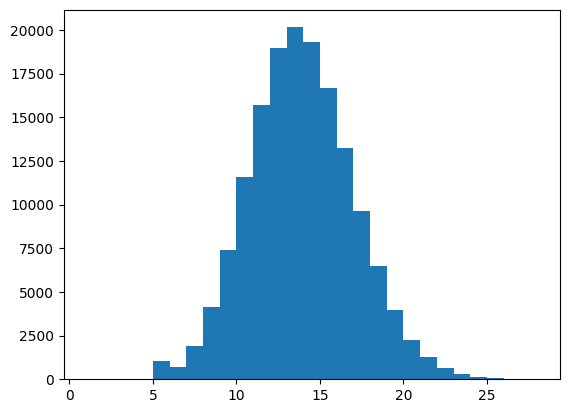

In [7]:
import numpy as np
train_tokens = '/home/jan/projects/HARVARD/mikail/graph_transformer/data/tokens_path_train.npy'
train_tokens = np.load(train_tokens, allow_pickle=True)
lens = []
for inp in train_tokens:
    lens.append(len(inp))
# plot histogram of lens
import matplotlib.pyplot as plt
plt.hist(lens, bins=range(1, max(lens) + 1))
plt.show()